In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
from pprint import *
from tqdm import tqdm
import math

In [2]:
def conv2(a,b):
    ma,na = a.shape
    mb,nb = b.shape
    return np.fft.ifft2(np.fft.fft2(a,[2*ma-1,2*na-1])*np.fft.fft2(b,[2*mb-1,2*nb-1]))


In [3]:
def normxcorr2(b,a):
    c = conv2(a,np.flipud(np.fliplr(b)))
    a = conv2(a**2, np.ones(b.shape))
    b = sum(b.flatten()**2)
    c = c/np.sqrt(a*b)
    return c


In [4]:
def edge_detection(im):
    dx = cv.Sobel(im, cv.CV_64F, 1, 0, ksize=5)
    dy = cv.Sobel(im, cv.CV_64F, 0, 1, ksize=5)
    gradient = np.sqrt(np.multiply(dx, dx) + np.multiply(dy, dy))
    max_val = np.amax(gradient)
    min_val = np.amin(gradient)
    norm_gradient = np.around(255 * (gradient - min_val) / (max_val - min_val))
    norm_gradient = norm_gradient.astype(np.uint8)
    return norm_gradient


In [46]:
def crop_image(im, w, h):
    colsum = np.sum(im, axis=1)
    rowsum = np.sum(im, axis=0)
    w_mid = w // 2
    h_mid = h // 2
    idx1 = np.argmax(colsum[6:h_mid])
    idx2 = np.argmax(colsum[h_mid:h - 6])
    idx3 = np.argmax(rowsum[6:w_mid])
    idx4 = np.argmax(rowsum[w_mid:w - 6])
    val1 = colsum[idx1+6]
    val2 = colsum[idx2+h_mid]
    val3 = rowsum[6+idx3]
    val4 = rowsum[idx4+w_mid]
    threshold = np.double(0.02)
    print(val1 + val2 + val3 + val4)
#     if val1 != np.max(colsum[6:h_mid]) or val2 != np.max(colsum[h_mid:h-6]) or val3 != np.max(rowsum[6:w_mid]) or val4 != np.max(rowsum[w_mid:w-6]):
#         print("FUCK")
    # print(rowsum.size)
    print(val1+val2+val3+val4, threshold*np.double(np.sum(colsum)), idx1, idx2, idx3, idx4)
    if val1 + val2 + val3 + val4 < threshold*np.double(np.sum(colsum)):
        print("No Crop")
        return im
    else:
        return im[idx1+6:idx2 + h_mid, idx3+6:idx4 + w_mid]


In [16]:
def test(filename, foldername, pptfilename, pptfoldername):
    img = cv.imread(os.path.join("Dataset", foldername, filename))
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    h, w, _ = img.shape
    edgy = edge_detection(imgray)
    img = crop_image(edgy, w, h)
    
    ppt = cv.imread(os.path.join("Dataset", pptfoldername, pptfilename))
    imgray = cv.cvtColor(ppt, cv.COLOR_BGR2GRAY)
    h, w, _ = ppt.shape
    edgy = edge_detection(imgray)
    ppt = crop_image(edgy, w, h)
    
    img_mean = img.mean()
    h, w = img.shape
#     print (w,h)
#     print(img.shape)
    img_norm = [x - img_mean for x in img]
    resized_ppt = cv.resize(ppt, (w, h))
    ppt_mean = resized_ppt.mean()
    ppt_norm = [x - ppt_mean for x in resized_ppt]
    numerator = np.sum(np.multiply(img_norm, ppt_norm))
    denominator = np.sqrt(np.multiply(np.sum(np.square(img_norm)), np.sum(np.square(ppt_norm))))
    cur_max = numerator/denominator
    print("Current correlation")
    print(cur_max)
    return img, ppt
    

In [48]:
img, ppt = test("2.jpg", "03_29", "ppt.jpg", "03_29")

244987
244987 99291.26000000001 58 477 53 636
1138610
1138610 204902.7 55 478 56 638
Current correlation
0.6752980668393238


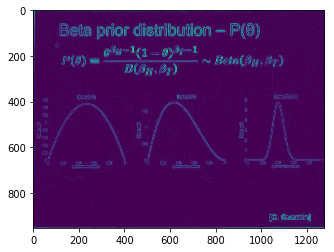

In [49]:
plt.imshow(img)

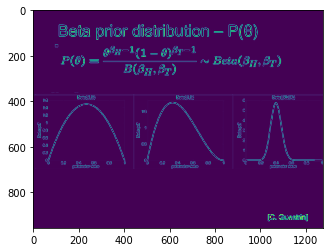

In [50]:
plt.imshow(ppt)
